<h1 style='color:blue'>Assignments related to MatplotLib
    using Tips dataset</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Draw bar graph showing total tip amount for each day

In [4]:
day_total = tips.groupby('day', as_index=False)['tip'].sum()
day_total

,day,tip
0,Thur,171.83
1,Fri,51.96
2,Sat,260.40
3,Sun,247.39


Text(0, 0.5, 'Total Tip')

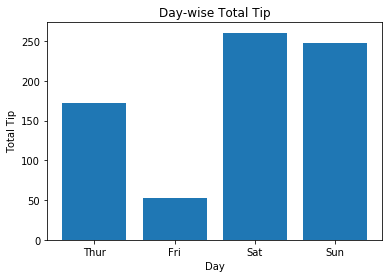

In [5]:
plt.bar(day_total['day'], day_total['tip'])
plt.title("Day-wise Total Tip")
plt.xlabel("Day")
plt.ylabel("Total Tip")

#### Draw a pie chart showing total_bill for each day 

In [6]:
day_total = tips.groupby('day', as_index=False)['total_bill'].sum()
day_total

,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


Text(0.5, 1.0, 'Day-wise Total Bill')

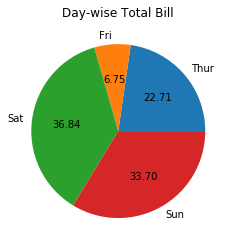

In [7]:
plt.pie(day_total['total_bill'], labels = day_total['day'], autopct ="%.2f")
plt.title("Day-wise Total Bill")

#### Display two pie charts - one for total bill amount for male and another for female -  for each day

In [8]:
male_bill = tips[(tips['sex'] == 'Male')].groupby('day', as_index=False)['total_bill'].sum()
female_bill = tips[(tips['sex'] == 'Female')].groupby('day', as_index=False)['total_bill'].sum()

Text(0.5, 1.0, 'Female Day-wise Total Bill')

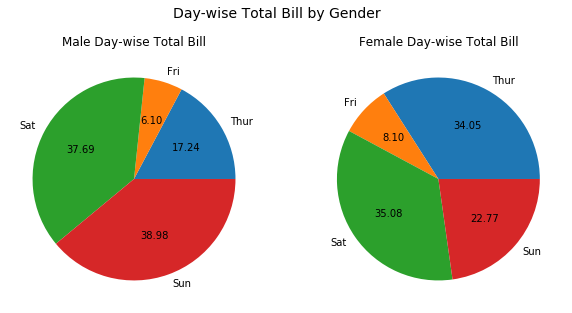

In [9]:
fig,ax = plt.subplots(1,2)
fig.suptitle('Day-wise Total Bill by Gender', fontsize=14)
fig.set_size_inches(10,5)
ax[0].pie(male_bill['total_bill'], labels = male_bill['day'], autopct ="%.2f")
ax[0].set_title("Male Day-wise Total Bill")

ax[1].pie(female_bill['total_bill'], labels = female_bill['day'], autopct ="%.2f")
ax[1].set_title("Female Day-wise Total Bill")

# fig.savefig("Day_wise_Total_Bill_by_Gender.jpg")

#### Display a histogram for tip percentage 

(array([ 31., 120.,  80.,  10.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([ 3.56381359, 10.3108805 , 17.05794742, 23.80501434, 30.55208125,
        37.29914817, 44.04621509, 50.79328201, 57.54034892, 64.28741584,
        71.03448276]),
 <a list of 10 Patch objects>)

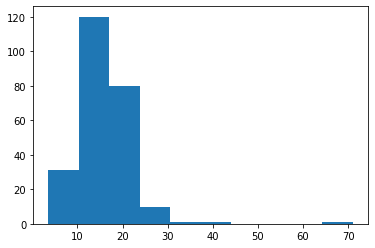

In [10]:
tip_per = tips['tip'] / tips['total_bill'] * 100
plt.hist(tip_per)

#### Display a stacked bar for total bill of smokers and non-smokers for each day 

In [11]:
smoker_total  = pd.crosstab(tips['day'], tips['smoker'], tips['total_bill'], aggfunc=sum)
smoker_total

smoker,Yes,No
day,,
Thur,326.24,770.09
Fri,252.20,73.68
Sat,893.62,884.78
Sun,458.28,1168.88


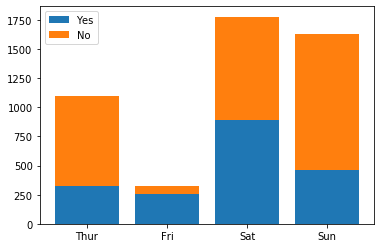

In [12]:
ax = plt.subplot()
ax.bar(smoker_total.index , height=smoker_total['Yes'])
ax.bar(smoker_total.index , height=smoker_total['No'],bottom = smoker_total["Yes"])
ax.legend(smoker_total.columns)

#### Display stacked bar for count of transactions for male and female for each day 

In [13]:
gender_total  = pd.crosstab(tips['day'], tips['sex'], tips['total_bill'], aggfunc='count')
gender_total

sex,Male,Female
day,,
Thur,30,32
Fri,10,9
Sat,59,28
Sun,58,18


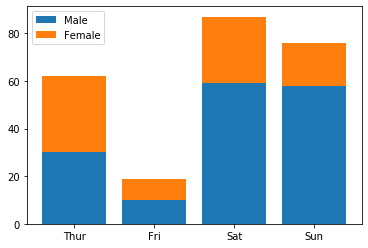

In [14]:
ax = plt.subplot()
ax.bar(gender_total.index , height=gender_total['Male'])
ax.bar(gender_total.index , height=gender_total['Female'],bottom = gender_total["Male"])
ax.legend(gender_total.columns)

#### Display scatter plot for tip amount and total bill for first 10 highest tip amounts 

Text(0, 0.5, 'Tip')

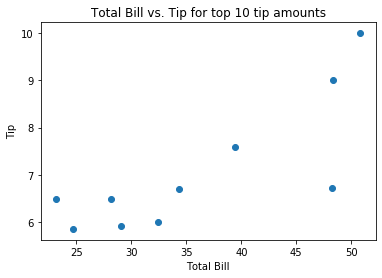

In [15]:
top_tip = tips.nlargest(10,'tip')
plt.scatter(top_tip['total_bill'], top_tip['tip'])
plt.title("Total Bill vs. Tip for top 10 tip amounts")
plt.xlabel("Total Bill")
plt.ylabel("Tip")

#### Display scatter plot for tip percentage and size of the table where total_bill is more than 10

In [16]:
df = tips[(tips['total_bill'] > 10)]
df['tip_per'] = df['tip'] / df['total_bill'] * 100

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Tip Percentage')

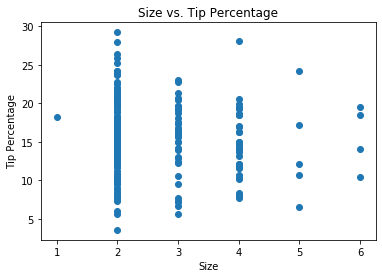

In [17]:
plt.scatter(df['size'], df['tip_per'])
plt.title("Size vs. Tip Percentage")
plt.xlabel("Size")
plt.ylabel("Tip Percentage")

#### Display bar graph showing % of contribution each day has on total income 

In [18]:
total = tips['total_bill'].sum()
df = tips.groupby('day')['total_bill'].sum()*100/total
df

day
Thur    22.708828
Fri      6.750114
Sat     36.836883
Sun     33.704174
Name: total_bill, dtype: float64

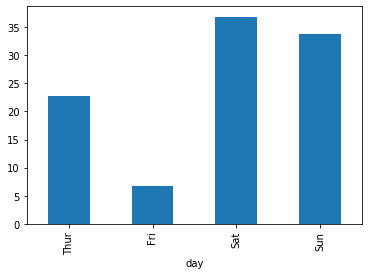

In [19]:
df.plot(kind='bar')

#### Display a line graph for total tip amount for each day and show total at the points 

In [20]:
day_total = tips.groupby('day', as_index=False)['tip'].sum()
day_total

,day,tip
0,Thur,171.83
1,Fri,51.96
2,Sat,260.40
3,Sun,247.39


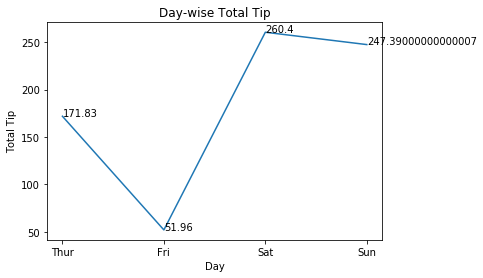

In [21]:
x = day_total['day']
y = day_total['tip']

plt.plot(x,y)
plt.title("Day-wise Total Tip")
plt.xlabel("Day")
plt.ylabel("Total Tip")

for a,b in zip(x, y): 
    plt.text(a, b, str(b))